In [1]:
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Change to root path
if os.path.basename(os.getcwd()) != 'Image_Inpainting':
    os.chdir('..')

from libs.pconv_model import PConvUnet
from libs.util import ImageChunker,MaskGenerator
from libs.pconv_model import PConvUnet

%load_ext autoreload
%autoreload 2



C:\Users\cuhksz\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cuhksz\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cuhksz\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cuhksz\

In [70]:
# SETTINGS
SAMPLE_IMAGE = 'C:\\Users\\cuhksz\\Desktop\\lectures\\CIE-6032\\Image_Inpainting\\test_for_report\\butterfly.jpg'
MASK_IMAGE = 'C:\\Users\\cuhksz\\Desktop\\lectures\\CIE-6032\\Image_Inpainting\\test_for_report\\mask\\butterfly_mask.jpg'
BATCH_SIZE = 4

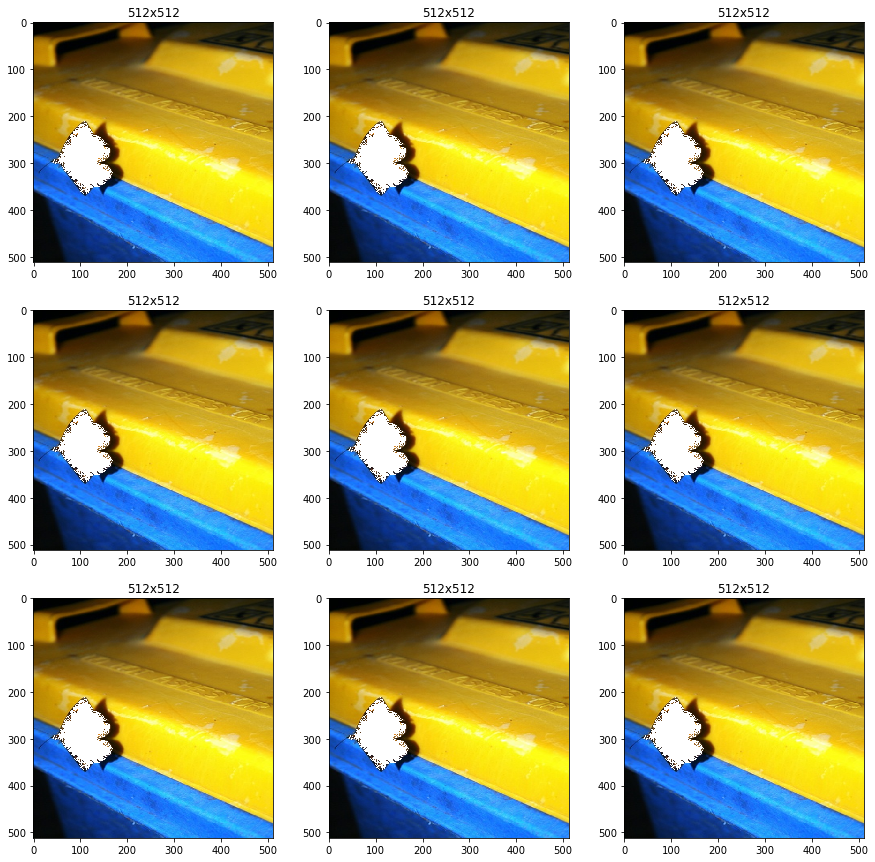

In [71]:
# Image samplings
crops = [
    [512, 512], [512, 512], [512, 512],
    [512, 512], [512, 512], [512, 512],
    [512, 512], [512, 512], [512, 512],
]
mask_generator = MaskGenerator(512, 512, 3, rand_seed=16)
# Setup the figure
_, axes = plt.subplots(3, 3, figsize=(15, 15))

# Set random seed
np.random.seed(7)

# Lists for saving images and masks
imgs, masks = [], []

# Plot images
for crop, ax in zip(crops, axes.flatten()):
    
    # Load image
    im = Image.open(SAMPLE_IMAGE).resize((512,512))
    
    # Crop image
#     h, w = im.height, im.width
#     left = np.random.randint(0, w - crop[1])
#     right = left + crop[1]
#     upper = np.random.randint(0, h - crop[0])
#     lower = upper + crop[0]
#     im = im.crop((left, upper, right, lower))

    # Create masked array
    im = np.array(im) / 255
    mask = mask_generator.sample()
#     mask = 1

    mask = Image.open(MASK_IMAGE).resize((512,512))
    mask = np.array(mask) / 255
    mask2 = deepcopy(mask)
    im[mask==1] = 1
    mask2[mask==1] =0 #for different type of mask
    mask2[mask==0]=1
    # Store for prediction
    imgs.append(im)
    masks.append(mask)
    # Show image
    ax.imshow(im)
#     ax.imshow(mask2)
    
    ax.set_title("{}x{}".format(crop[0], crop[1]))

In [4]:
from libs.pconv_model import PConvUnet
model = PConvUnet(vgg_weights=None, inference_only=True)

In [5]:
model.load('C:\\Users\\cuhksz\\Desktop\\lectures\\CIE-6032\\PConv-Keras-master\\data\\logs\\weights.26-1.07.h5', train_bn=False)
# model.load('C:\\Users\\cuhksz\\Desktop\\lectures\\CIE-6032\\PConv-Keras-master\\data\\logs\\vgg16.h5', train_bn=False)

Image with size: (512, 512, 3)


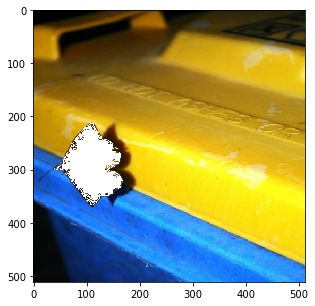

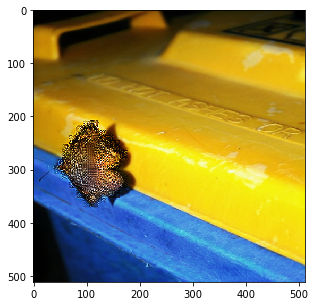

Image with size: (512, 512, 3)


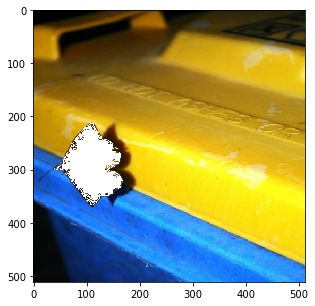

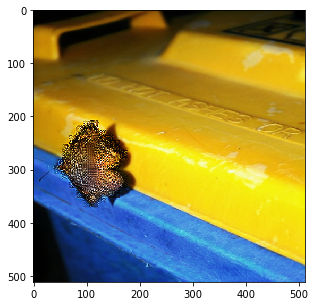

Image with size: (512, 512, 3)


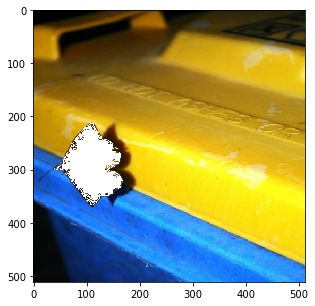

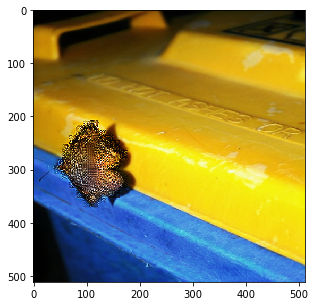

Image with size: (512, 512, 3)


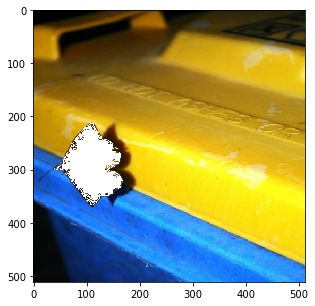

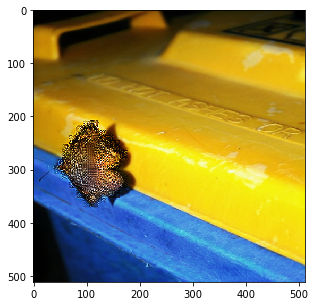

Image with size: (512, 512, 3)


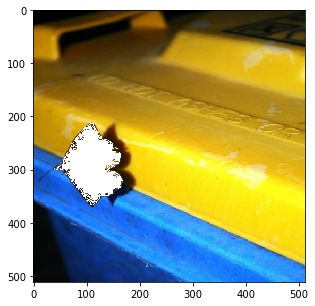

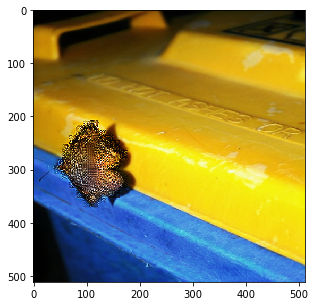

Image with size: (512, 512, 3)


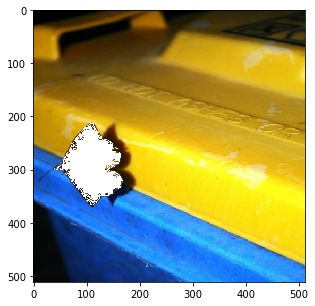

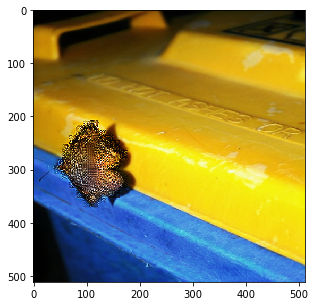

Image with size: (512, 512, 3)


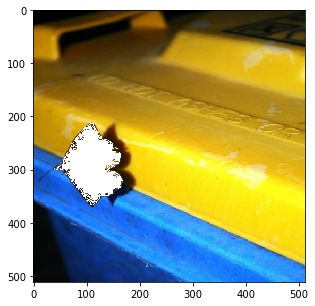

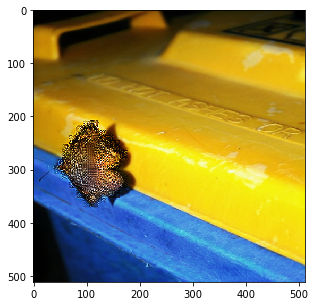

Image with size: (512, 512, 3)


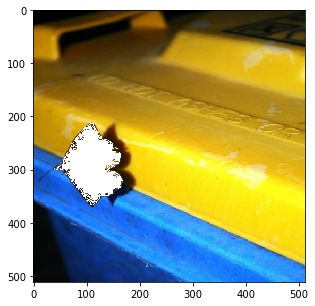

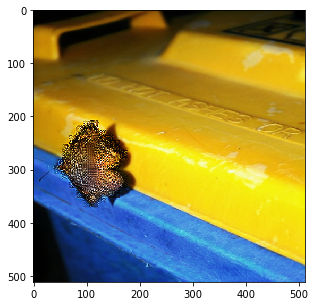

Image with size: (512, 512, 3)


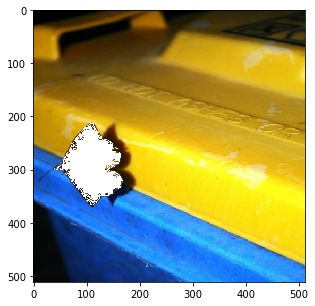

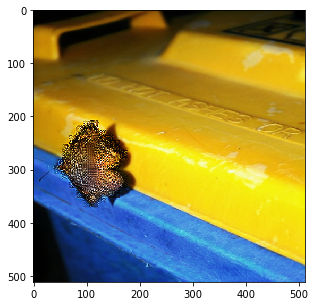

In [72]:
from libs.pconv_model import PConvUnet

# Used for chunking up images & stiching them back together
chunker = ImageChunker(512, 512, 30)

def plot_images(images, s=5):
    _, axes = plt.subplots(1, len(images), figsize=(s*len(images), s))
    if len(images) == 1:
        axes = [axes]
    for img, ax in zip(images, axes):
        ax.imshow(img)
    plt.show()
    
for img, mask in zip(imgs, masks):
    print("Image with size: {}".format(img.shape))

    # Process sample
    chunked_images = chunker.dimension_preprocess(deepcopy(img))
    chunked_masks = chunker.dimension_preprocess(deepcopy(mask2))
    pred_imgs = model.predict([chunked_images, chunked_masks])
    reconstructed_image = chunker.dimension_postprocess(pred_imgs, img)

    # Plot results
    plot_images(chunked_images)
    plot_images(pred_imgs)